In [ ]:
import pandas as pd

file_path = 'Dataset_extracted.xlsx'
data_preview = pd.read_excel(file_path)
data_preview.head()

,Unnamed: 0,Sequence,APAAC1,APAAC2,APAAC3,APAAC4,APAAC5,APAAC6,APAAC7,APAAC8,...,_PolarityC1,_PolarityC2,_PolarityC3,_NormalizedVDWVC1,_NormalizedVDWVC2,_NormalizedVDWVC3,_HydrophobicityC1,_HydrophobicityC2,_HydrophobicityC3,Labels
0,0,GLFSKFSGKGIKNFLIKGVKHIGKEVGMDVIRTGIDVAGCKIKGEC,2.221,2.221,2.221,4.443,4.443,4.443,0.000,19.991,...,0.391,0.283,0.326,0.370,0.326,0.304,0.304,0.304,0.391,AMP
1,1,MAFLKKSLFLVLFLGLVSLSICDEEKRQDEDDDDDDDEEKRGVFDI...,6.259,2.503,0.000,13.770,1.252,7.511,2.503,5.008,...,0.364,0.182,0.455,0.364,0.379,0.258,0.439,0.197,0.364,Non AMP
2,2,ARSYGNGVYCNNKKCWVNRGEATQSIIGGMISGWASGKAGM,9.894,4.947,9.894,0.000,4.947,2.474,2.474,19.788,...,0.317,0.415,0.268,0.463,0.268,0.268,0.268,0.463,0.268,AMP
3,3,YFCESCRKIIQKLEDMVGPQPNEDTVTQAASQVCDKLKILRGLCKK...,3.978,6.631,1.326,6.631,7.957,5.305,6.631,3.978,...,0.403,0.208,0.390,0.351,0.377,0.273,0.390,0.221,0.390,AMP
4,4,MRRITHFFGSLFLVELLRGMMLTGRHLFARKVTVQFPEEKTPQSPR...,7.384,11.077,0.615,5.539,4.923,8.000,4.308,6.154,...,0.358,0.278,0.364,0.383,0.327,0.290,0.340,0.340,0.321,Non AMP


# **Recursive Feature Elimination and Lasso Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import numpy as np

X = data_preview.drop(columns=["Unnamed: 0", "Sequence", "Labels"])
y = data_preview["Labels"].apply(lambda x: 1 if x == "AMP" else 0)

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X_train, y_train)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

rfe_ranking = rfe.ranking_
rfe_features = X.columns[np.argsort(rfe_ranking)]

lasso_coef = np.abs(lasso.coef_)
lasso_features = X.columns[np.argsort(-lasso_coef)]

feature_ranking = pd.DataFrame({
    "Feature": X.columns,
    "RFE_Rank": rfe_ranking,
    "Lasso_Importance": lasso_coef
})

feature_ranking = feature_ranking.sort_values(by=["RFE_Rank", "Lasso_Importance"], ascending=[True, False])

print(feature_ranking.head(20))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0163440999367594, tolerance: 0.9821432286381063
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1455399466531162, tolerance: 0.9821432286381063
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.144432751473687, tolerance: 0.9821432286381063
  model = cd_fast.enet_coordinate_descent_gram(


      Feature  RFE_Rank  Lasso_Importance
12    APAAC13         1          0.026342
5      APAAC6         2          0.116730
40          M         3          0.068917
33          E         4          0.089049
16    APAAC17         5          0.000000
31          D         6          0.041778
22    APAAC23         7          0.021658
14    APAAC15         8          0.000000
23    APAAC24         9          0.019104
34          Q        10          0.000000
3      APAAC4        11          0.064308
59  _ChargeC3        12          0.000000
7      APAAC8        13          0.002681
19    APAAC20        14          0.016262
32          C        15          0.056665
1      APAAC2        16          0.015804
38          L        17          0.000485
42          P        18          0.001872
11    APAAC12        19          0.009021
30          N        20          0.020961


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+02, tolerance: 1.228e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
detailed_feature_ranking = feature_ranking.sort_values(by=["RFE_Rank", "Lasso_Importance"], ascending=[True, False])
detailed_feature_ranking

,Feature,RFE_Rank,Lasso_Importance
12,APAAC13,1,0.026342
5,APAAC6,2,0.116730
40,M,3,0.068917
33,E,4,0.089049
16,APAAC17,5,0.000000
...,...,...,...
60,_PolarityC1,65,0.000000
58,_ChargeC2,66,0.000000
36,H,67,0.000000
61,_PolarityC2,68,0.000000


In [ ]:
rfe_ranking_df = pd.DataFrame({
    "Feature": X.columns,
    "RFE_Rank": rfe_ranking
}).sort_values(by="RFE_Rank")

rfe_ranking_df['Column_Number'] = rfe_ranking_df.index + 1

rfe_ranking_df.head(20)

,Feature,RFE_Rank,Column_Number
12,APAAC13,1,13
5,APAAC6,2,6
40,M,3,41
33,E,4,34
16,APAAC17,5,17
31,D,6,32
22,APAAC23,7,23
14,APAAC15,8,15
23,APAAC24,9,24
34,Q,10,35


In [ ]:
lasso_ranking_df = pd.DataFrame({
    "Feature": X.columns,
    "Lasso_Importance": lasso_coef
}).sort_values(by="Lasso_Importance", ascending=False)

lasso_ranking_df['Column_Number'] = lasso_ranking_df.index + 1

lasso_ranking_df.head(20)

,Feature,Lasso_Importance,Column_Number
5,APAAC6,0.116730,6
33,E,0.089049,34
40,M,0.068917,41
3,APAAC4,0.064308,4
4,APAAC5,0.061333,5
32,C,0.056665,33
46,Y,0.043160,47
31,D,0.041778,32
18,APAAC19,0.035613,19
12,APAAC13,0.026342,13


In [ ]:
top_10_rfe = rfe_ranking_df.head(10)
top_10_lasso = lasso_ranking_df.head(10)

top_10_comparison = pd.DataFrame({
    "RFE_Feature": top_10_rfe["Feature"].values,
    "RFE_Column_Number": top_10_rfe["Column_Number"].values,
    "Lasso_Feature": top_10_lasso["Feature"].values,
    "Lasso_Column_Number": top_10_lasso["Column_Number"].values
})

top_10_comparison

,RFE_Feature,RFE_Column_Number,Lasso_Feature,Lasso_Column_Number
0,APAAC13,13,APAAC6,6
1,APAAC6,6,E,34
2,M,41,M,41
3,E,34,APAAC4,4
4,APAAC17,17,APAAC5,5
5,D,32,C,33
6,APAAC23,23,Y,47
7,APAAC15,15,D,32
8,APAAC24,24,APAAC19,19
9,Q,35,APAAC13,13


In [ ]:
from sklearn.model_selection import cross_val_score

top_rfe_features = top_10_rfe["Feature"].values
top_lasso_features = top_10_lasso["Feature"].values

X_top_rfe = X[top_rfe_features]
X_top_lasso = X[top_lasso_features]

model = LogisticRegression(max_iter=1000)

rfe_cv_scores = cross_val_score(model, X_top_rfe, y, cv=5, scoring='accuracy')

lasso_cv_scores = cross_val_score(model, X_top_lasso, y, cv=5, scoring='accuracy')

cv_comparison = pd.DataFrame({
    "Method": ["RFE", "Lasso"],
    "Mean Accuracy": [rfe_cv_scores.mean(), lasso_cv_scores.mean()],
    "Std Accuracy": [rfe_cv_scores.std(), lasso_cv_scores.std()]
})

cv_comparison

,Method,Mean Accuracy,Std Accuracy
0,RFE,0.783903,0.002208
1,Lasso,0.779226,0.003139


# **Descriptive Statistics**

In [ ]:
import scipy.stats as stats

descriptive_stats = pd.DataFrame()

for feature in top_rfe_features:
    descriptive_stats[feature] = [
        X_top_rfe[feature].mean(),
        X_top_rfe[feature].median(),
        X_top_rfe[feature].mode().values[0],
        X_top_rfe[feature].skew(),
        X_top_rfe[feature].kurtosis(),
        X_top_rfe[feature].quantile(0.25),
        X_top_rfe[feature].quantile(0.5),
        X_top_rfe[feature].quantile(0.75)
    ]

descriptive_stats.index = ['Mean', 'Median', 'Mode', 'Skewness', 'Kurtosis', '25th Percentile', '50th Percentile', '75th Percentile']
descriptive_stats

,APAAC13,APAAC6,M,E,APAAC17,D,APAAC23,APAAC15,APAAC24,Q
Mean,2.083663,4.478175,2.129065,4.591795,4.230492,3.341569,-0.198766,3.975153,-0.169504,2.893020
Median,1.613500,3.931000,1.653000,4.000000,3.996500,2.857000,-0.025000,3.146000,-0.010000,2.461000
Mode,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skewness,2.210122,1.208986,2.111351,1.313039,1.428017,4.066732,-0.317174,4.380212,-0.843988,2.427990
Kurtosis,12.459285,2.914227,10.814811,3.448823,5.919100,72.435296,11.785018,36.967099,12.889921,20.843188
25th Percentile,0.000000,0.000000,0.000000,0.000000,1.168000,0.000000,-0.716000,0.000000,-0.614000,0.000000
50th Percentile,1.613500,3.931000,1.653000,4.000000,3.996500,2.857000,-0.025000,3.146000,-0.010000,2.461000
75th Percentile,3.269250,6.929250,3.333000,7.042000,6.280000,5.333000,0.556000,5.368000,0.436000,4.396000


# **Visualization**

**Histogram**

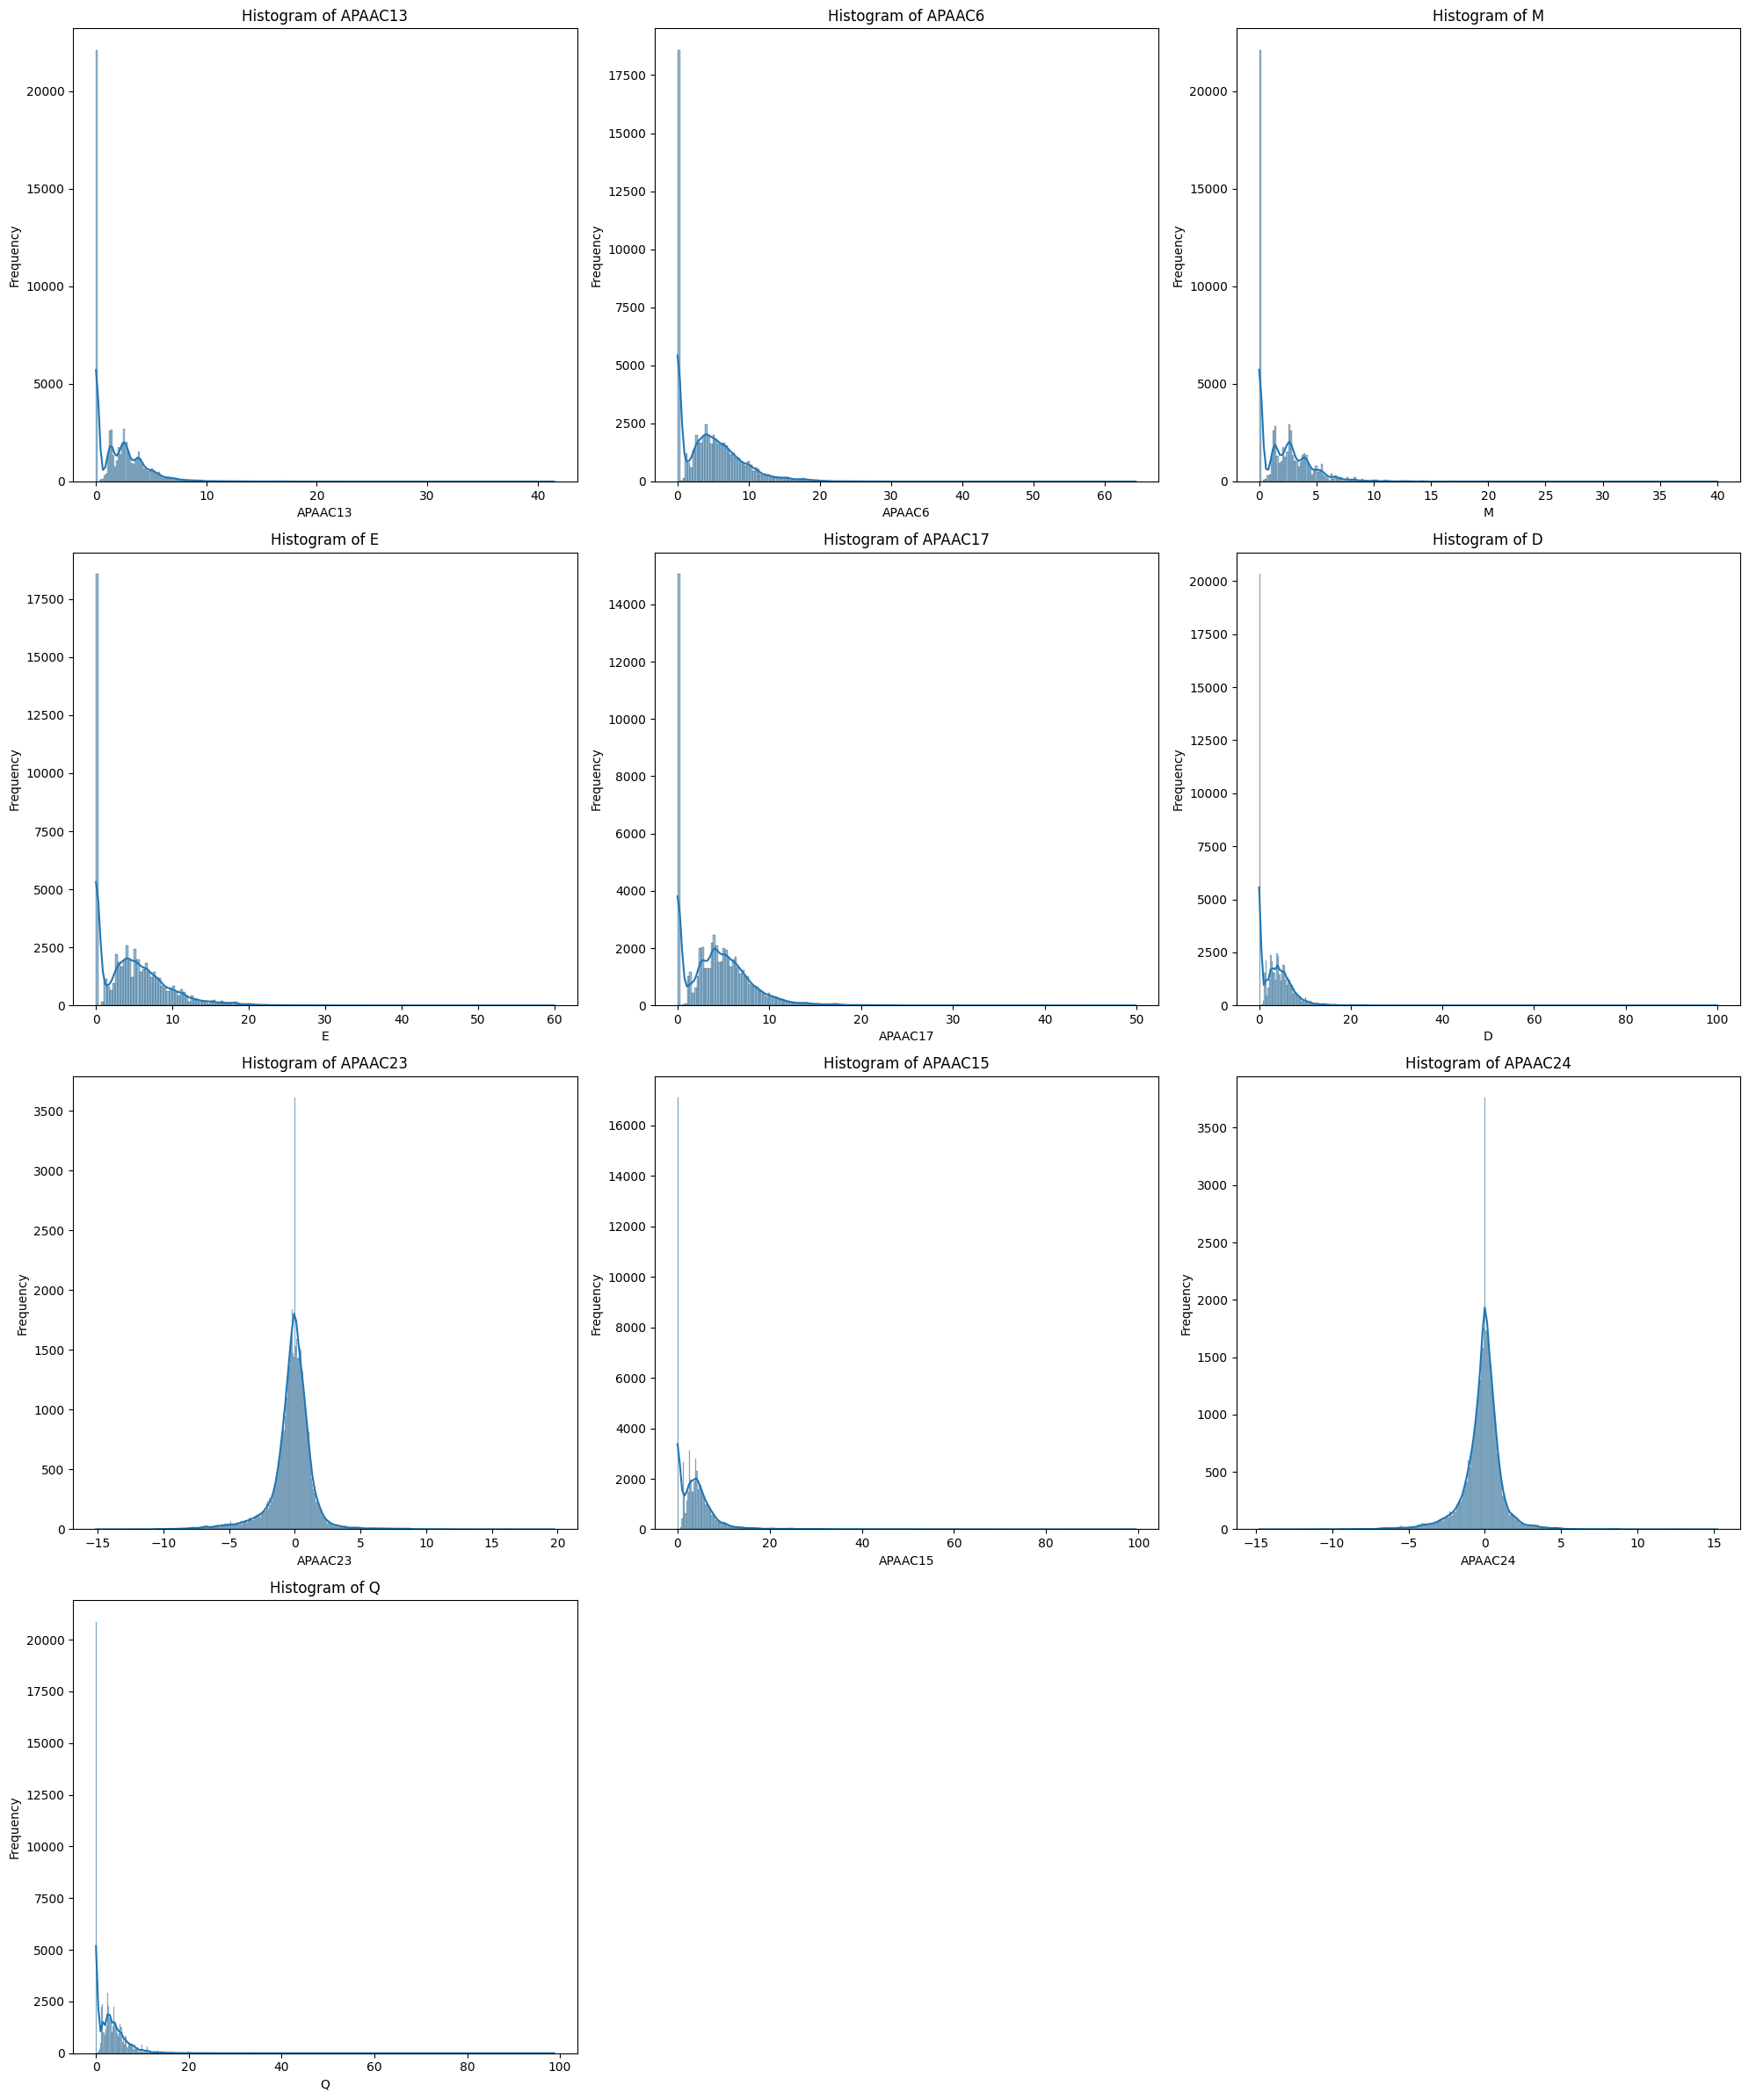

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
num_features = len(top_rfe_features)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(20, num_rows * 6))

for i, feature in enumerate(top_rfe_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(X_top_rfe[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Histograms.png')
plt.show()

**Boxplot**

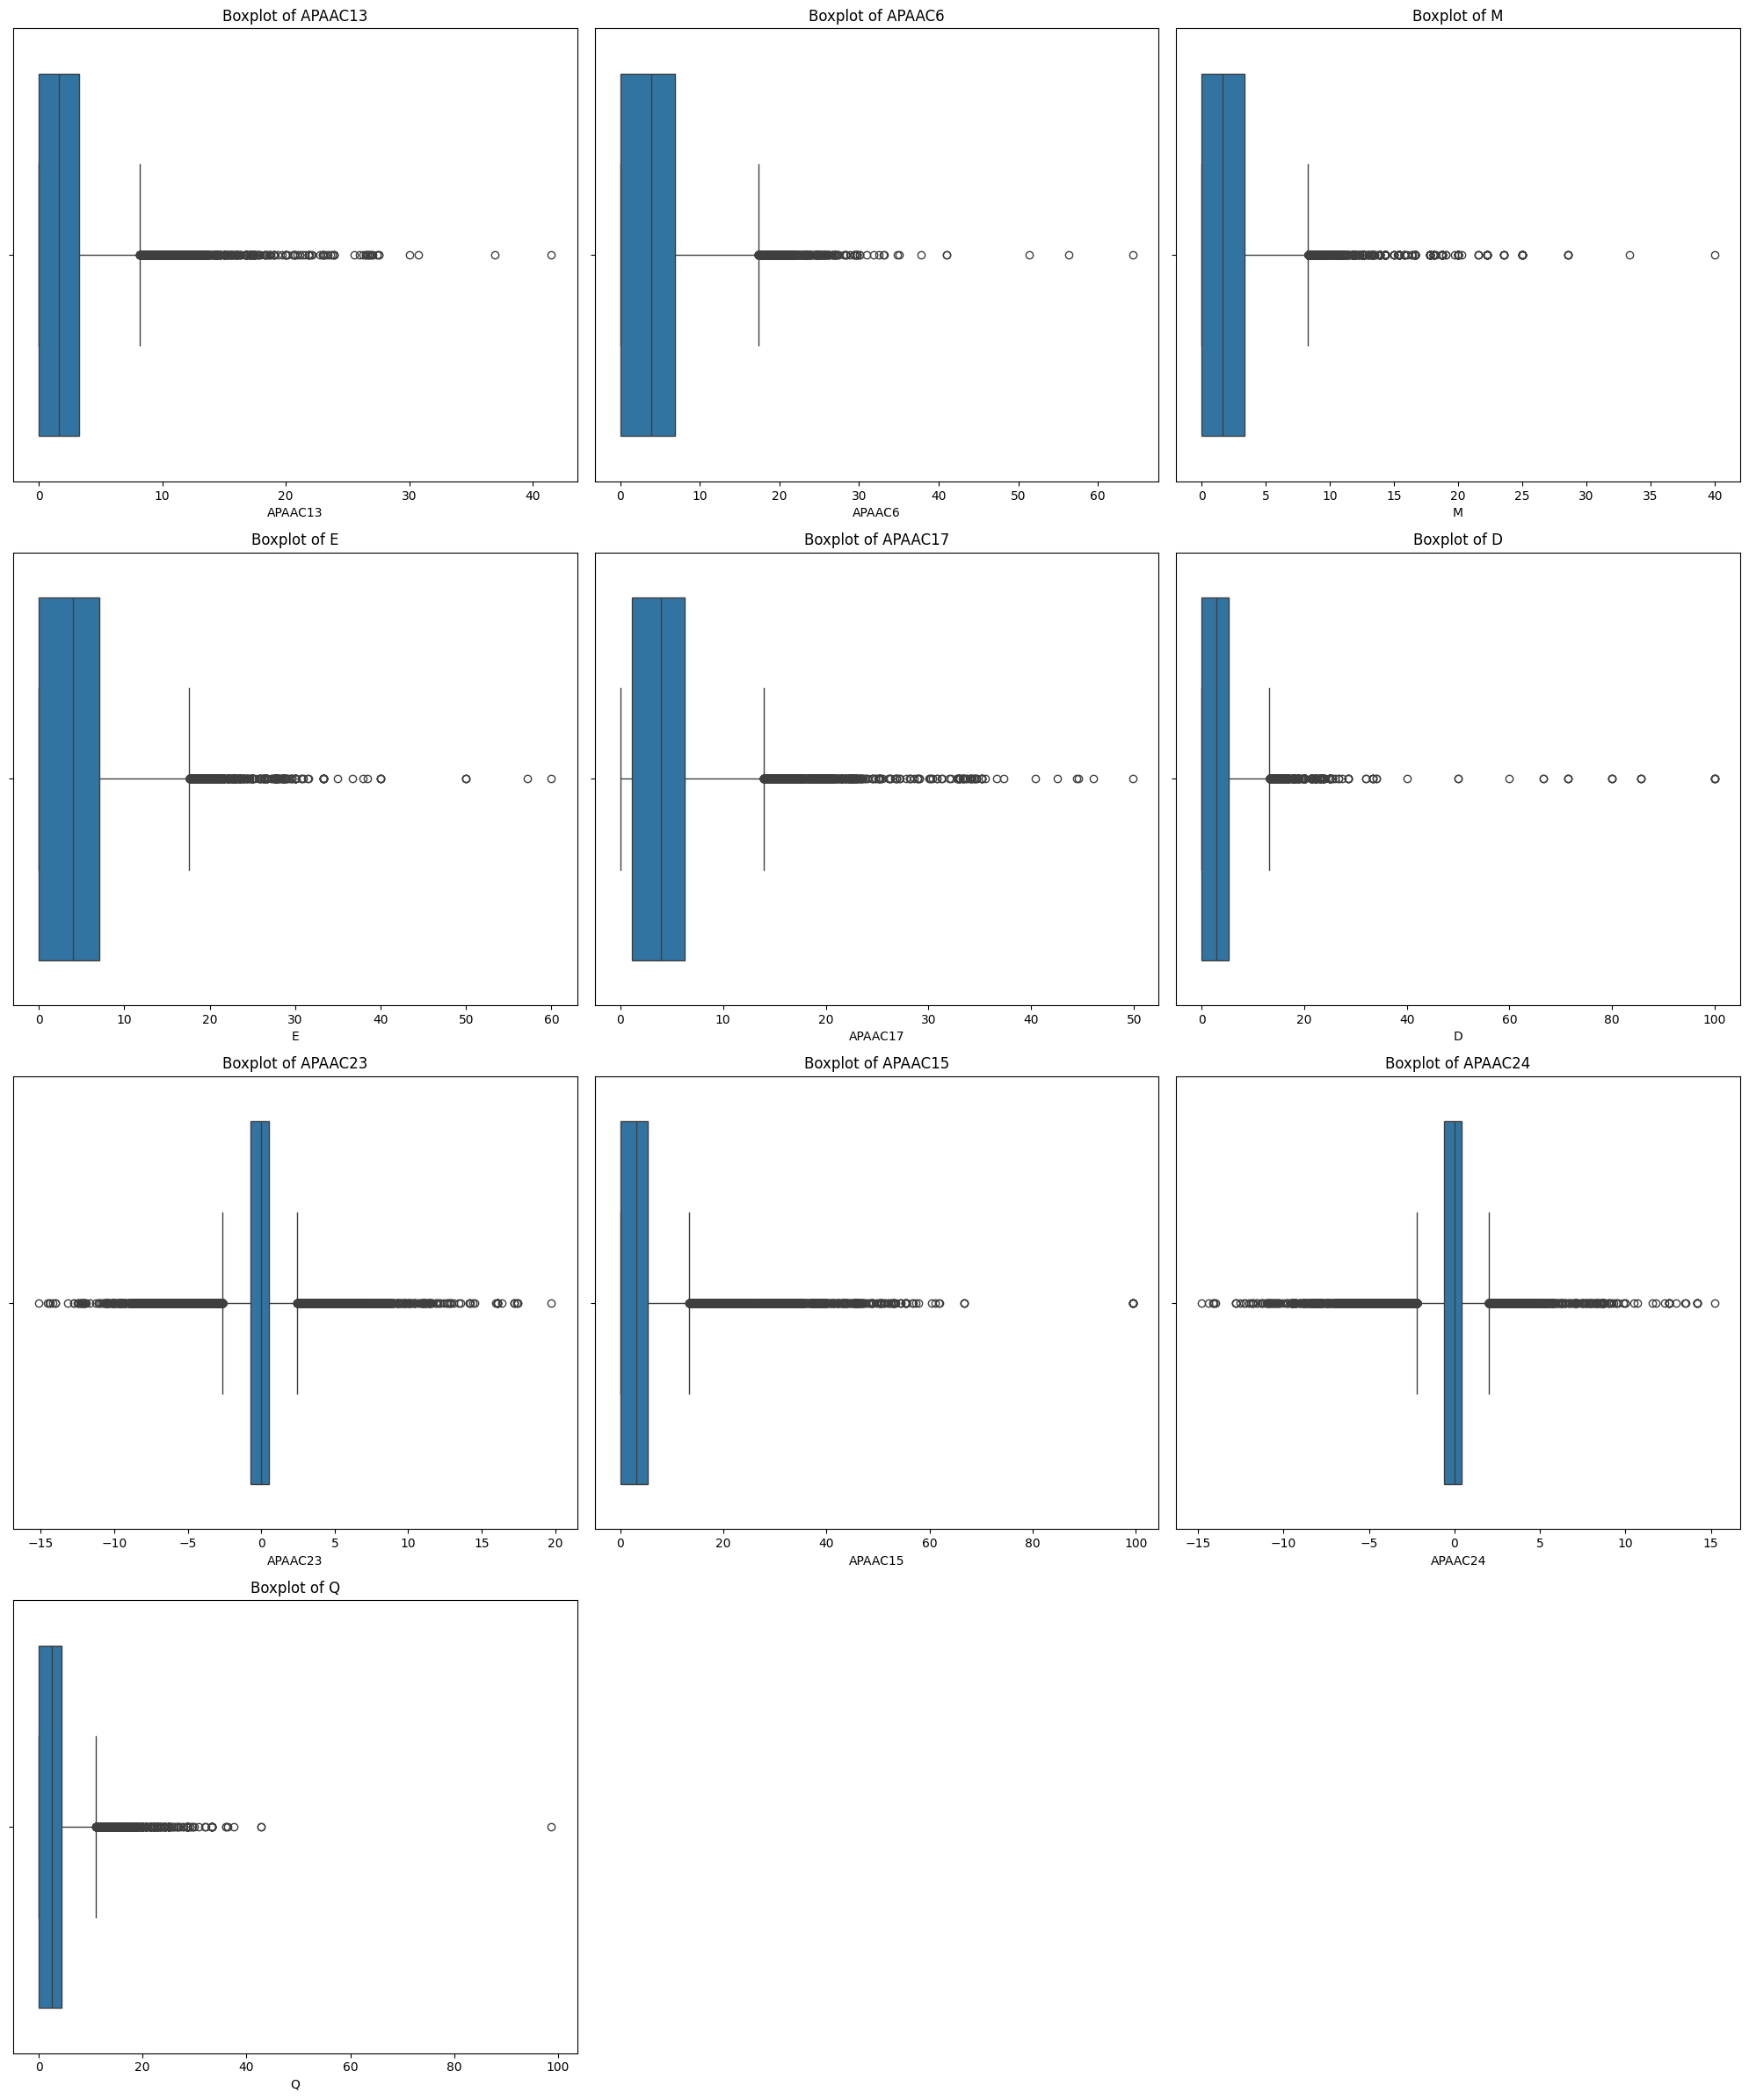

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(top_rfe_features)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

plt.figure(figsize=(20, num_rows * 6))

for i, feature in enumerate(top_rfe_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=X_top_rfe[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.savefig('Boxplots.png')
plt.show()

**Violin Plot**

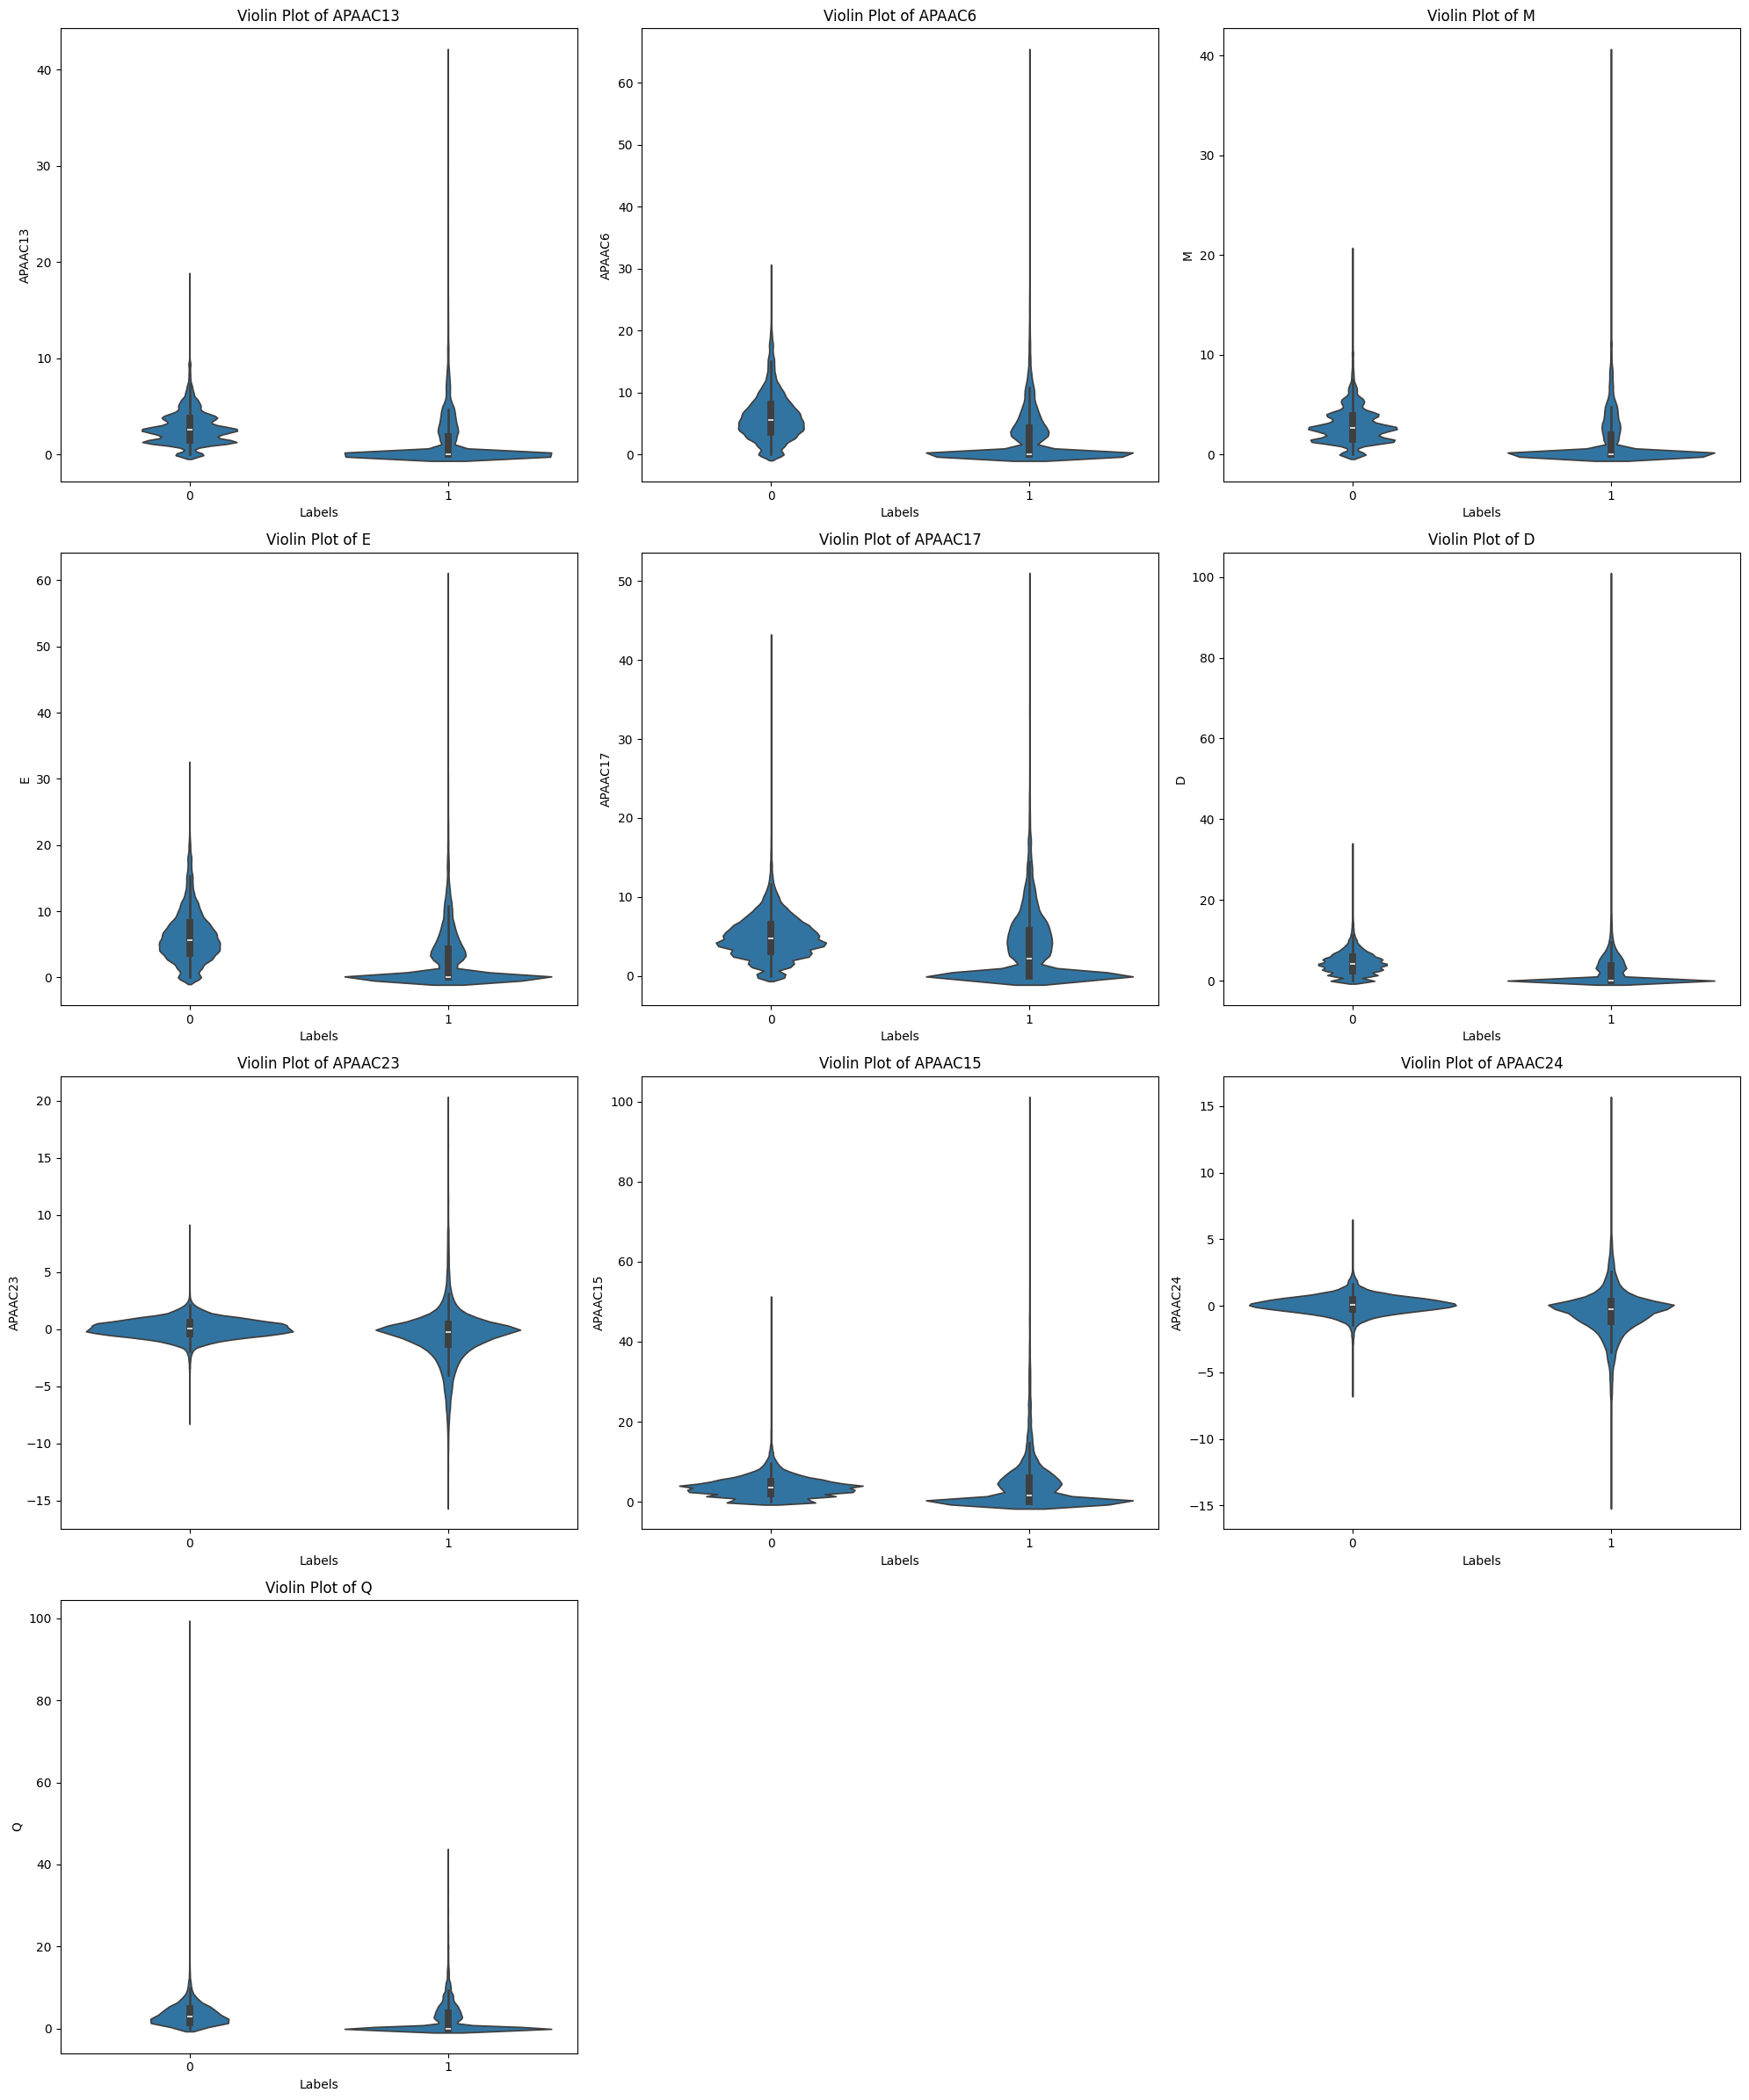

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, num_rows * 6))

for i, feature in enumerate(top_rfe_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.violinplot(x=y, y=X_top_rfe[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Labels')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('Violin plots.png')
plt.show()

**Pair plot**

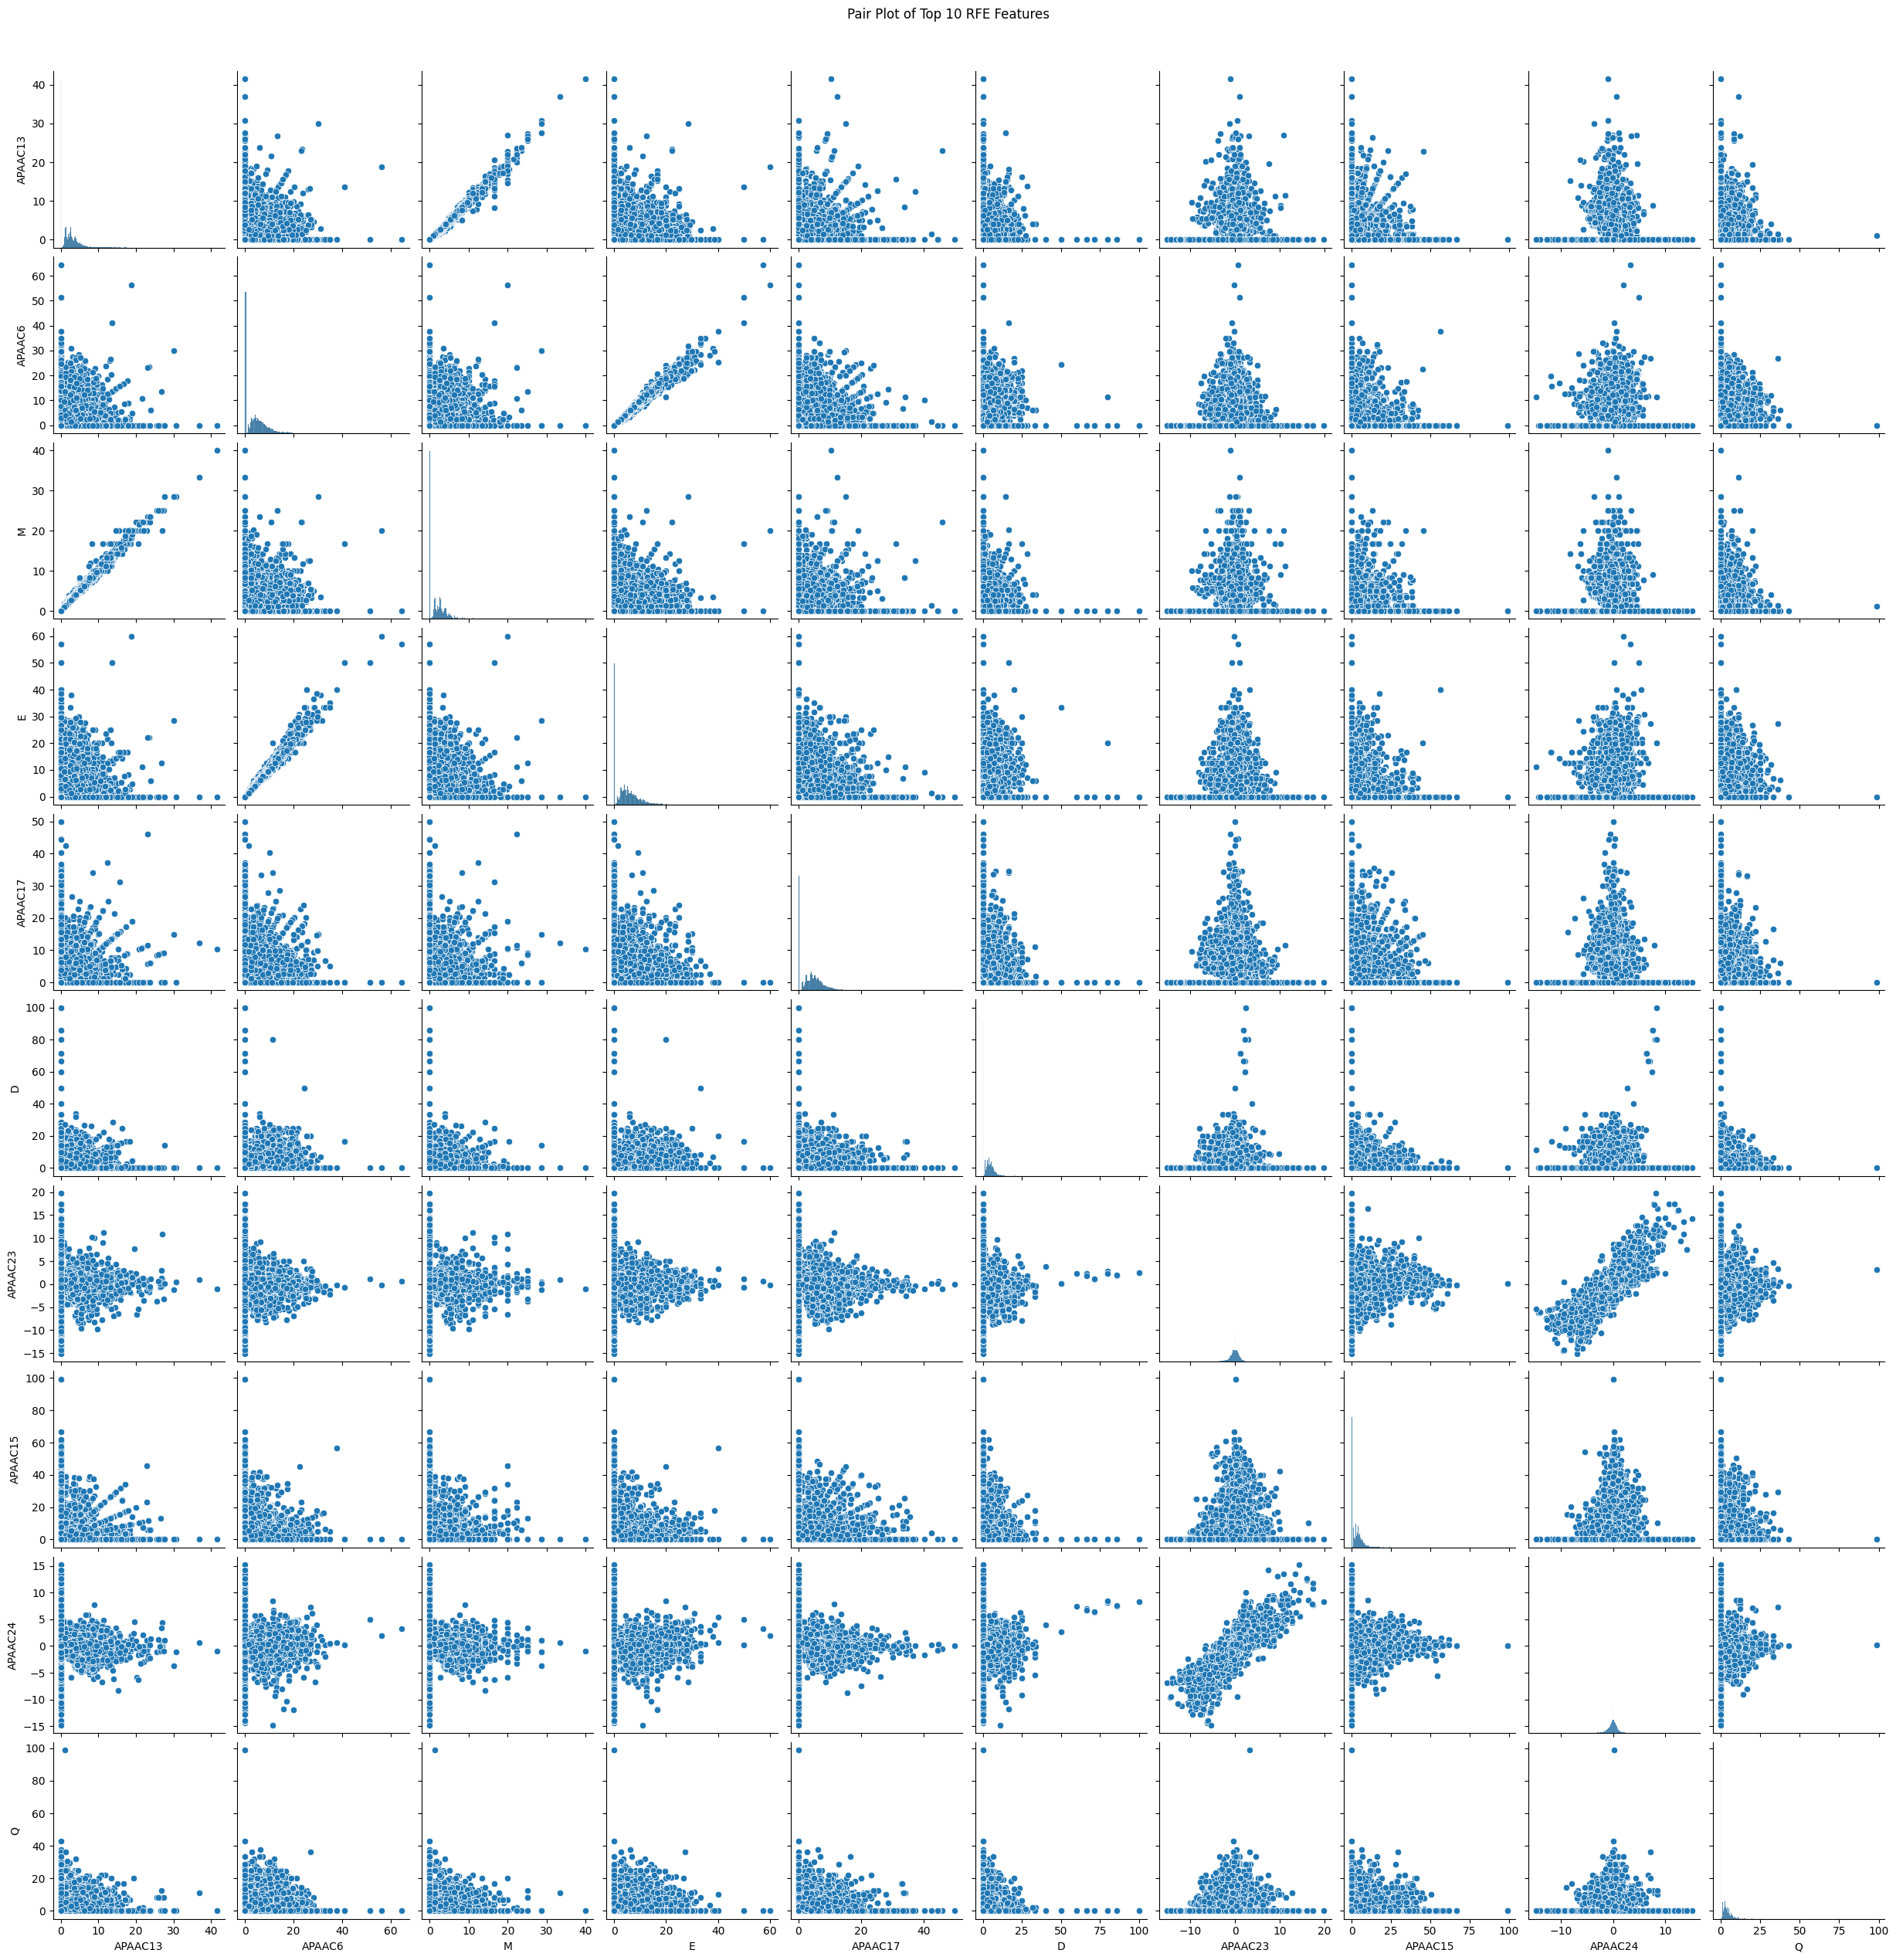

In [ ]:
import seaborn as sns

sns.pairplot(X_top_rfe)
plt.suptitle('Pair Plot of Top 10 RFE Features', y=1.02)
plt.savefig('Pair plots.png')
plt.show()

**Jitter plot**

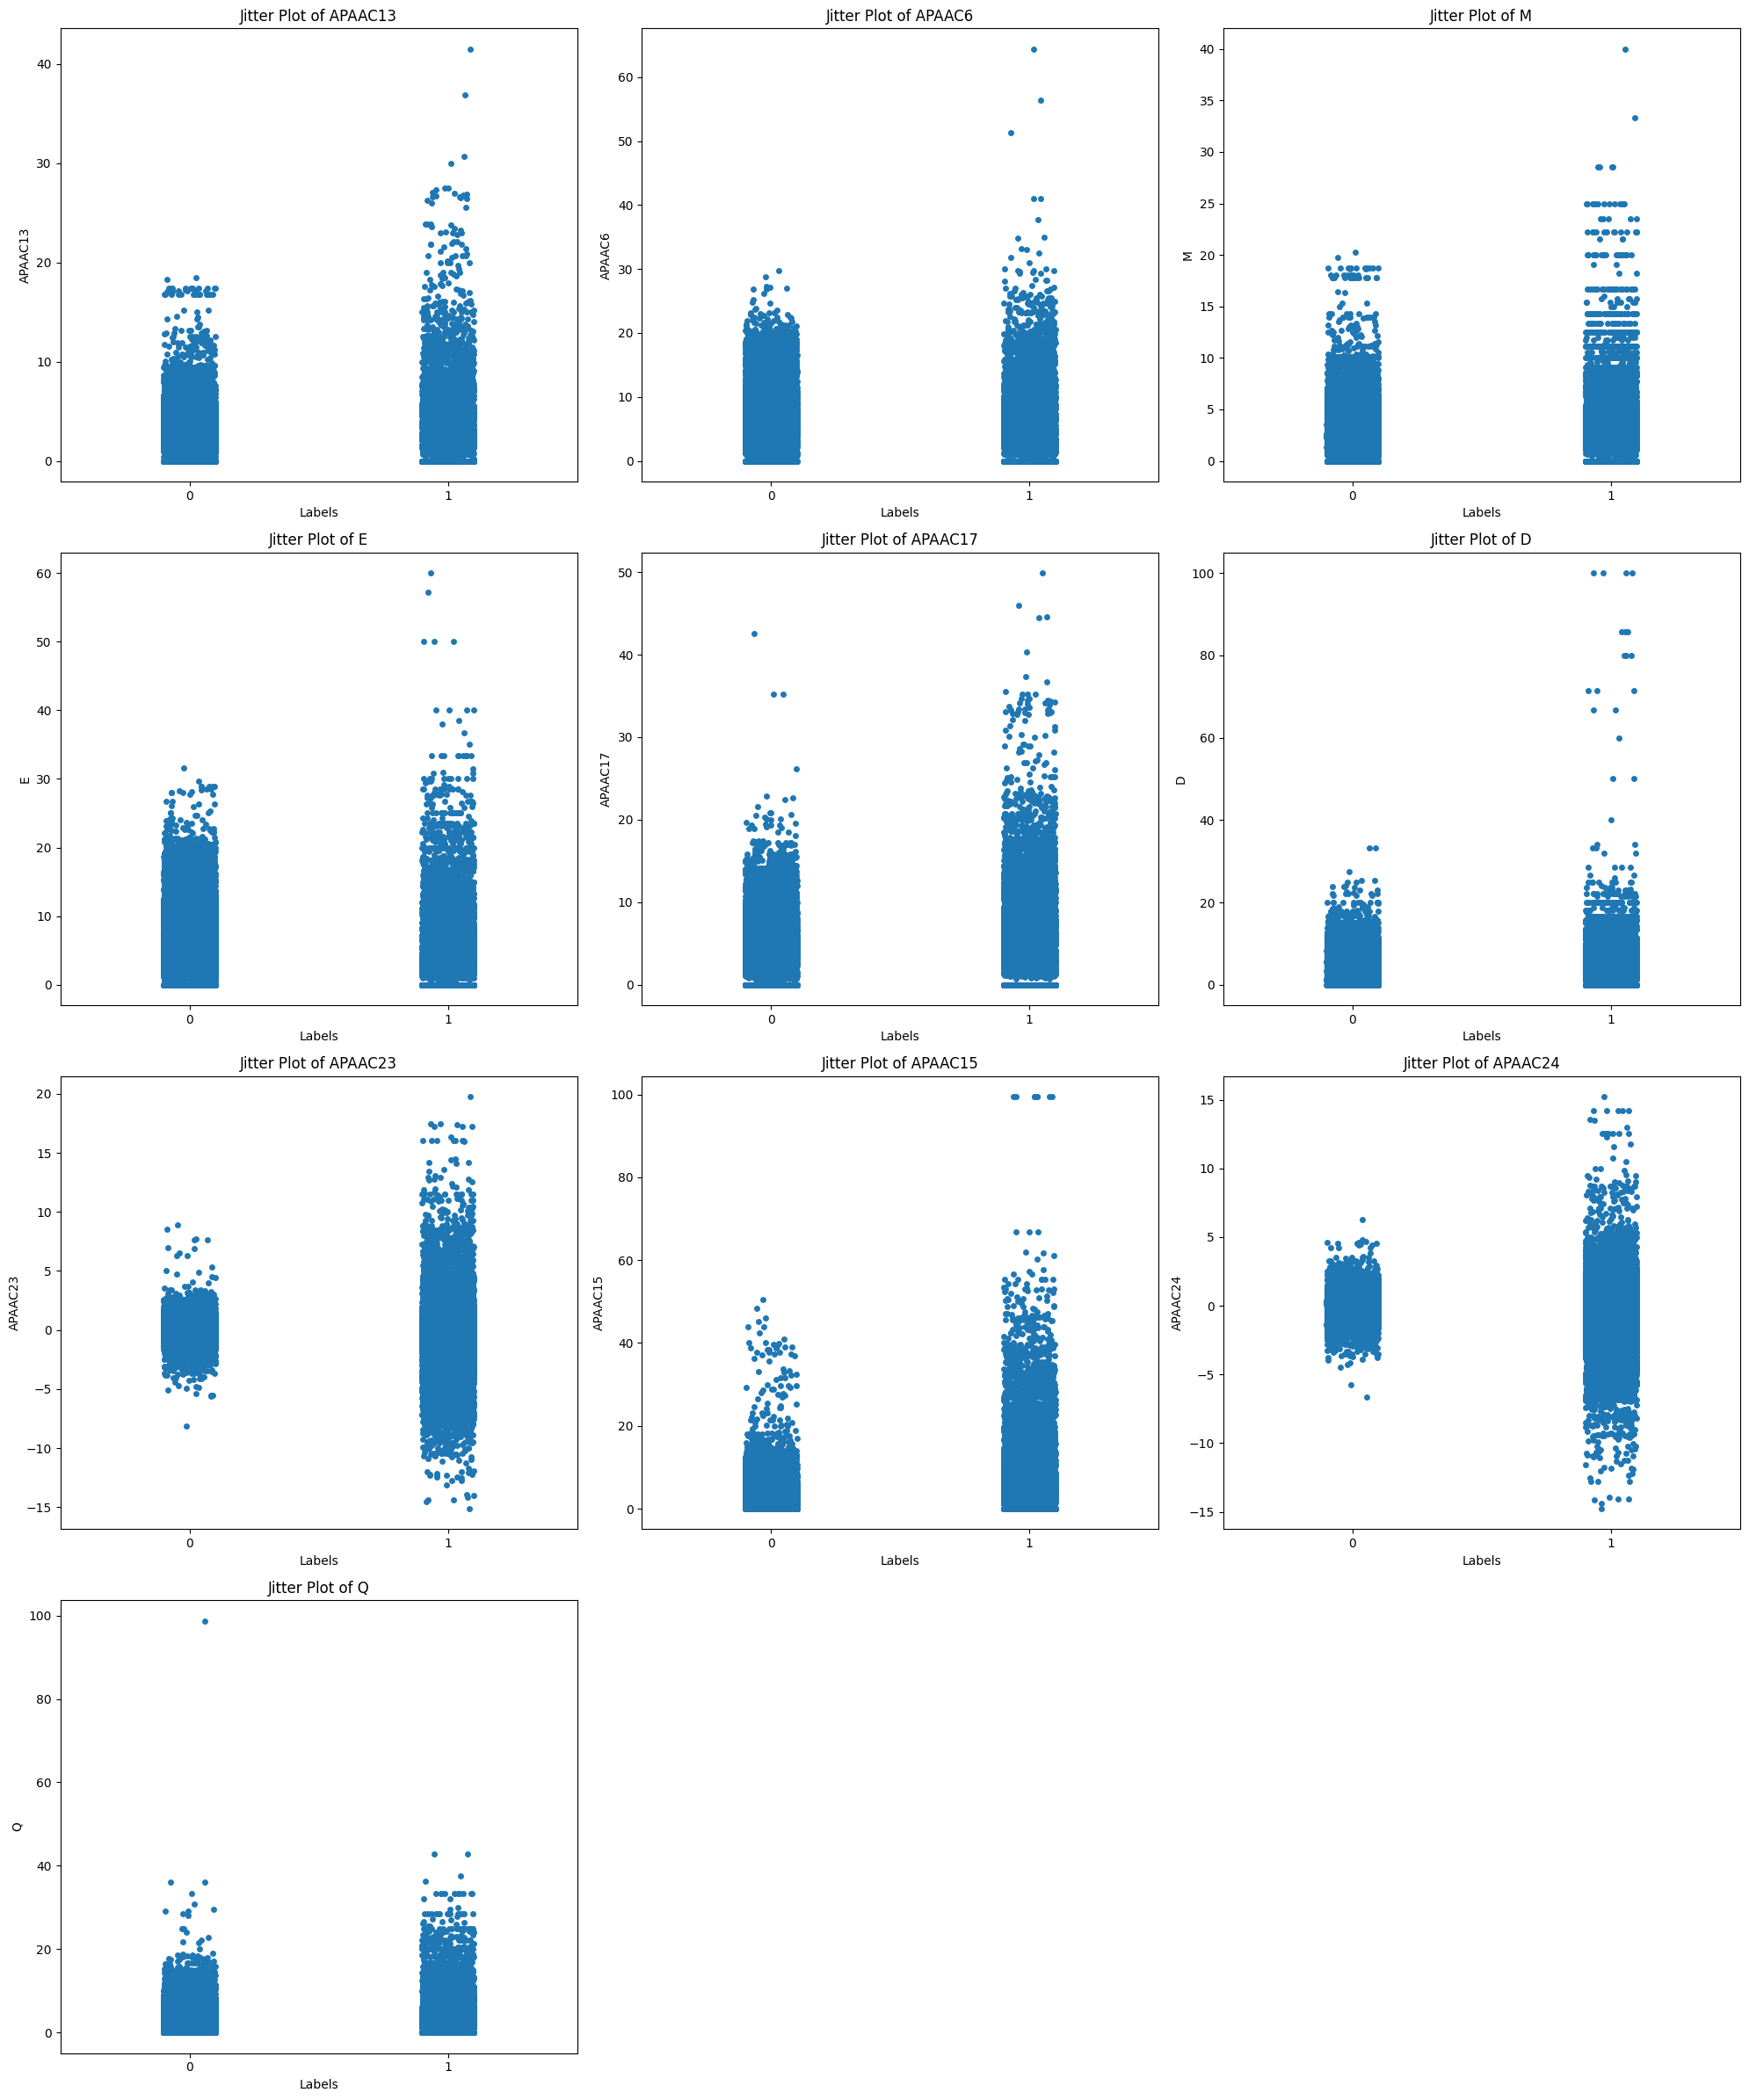

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, num_rows * 6))

for i, feature in enumerate(top_rfe_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.stripplot(x=y, y=X_top_rfe[feature], jitter=True)
    plt.title(f'Jitter Plot of {feature}')
    plt.xlabel('Labels')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('Jitter plots.png')
plt.show()

**Heatmap**

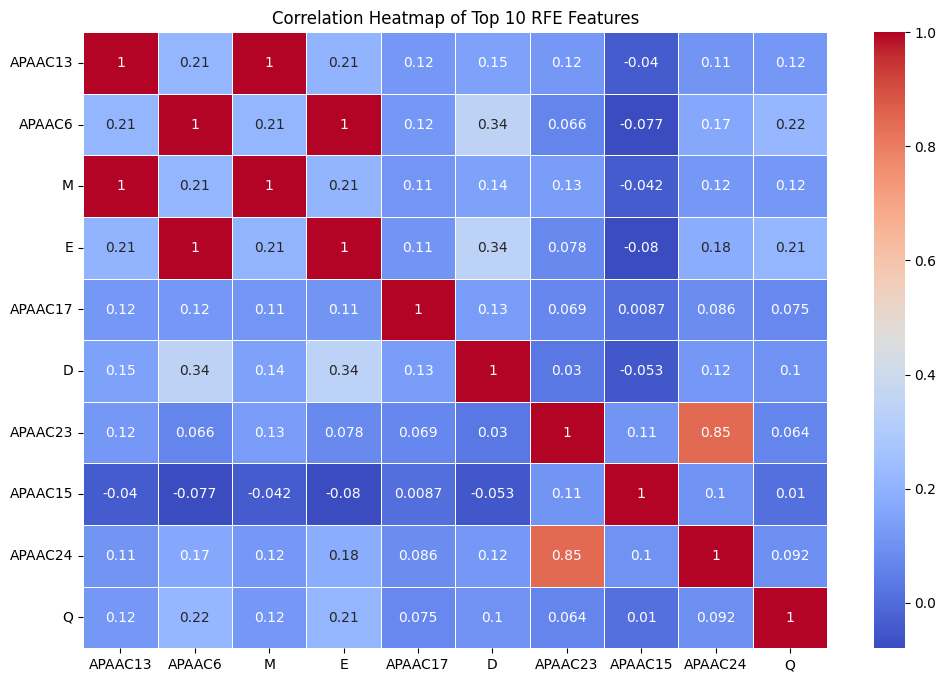

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_top_rfe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 RFE Features')
plt.show()

**Density Plot**

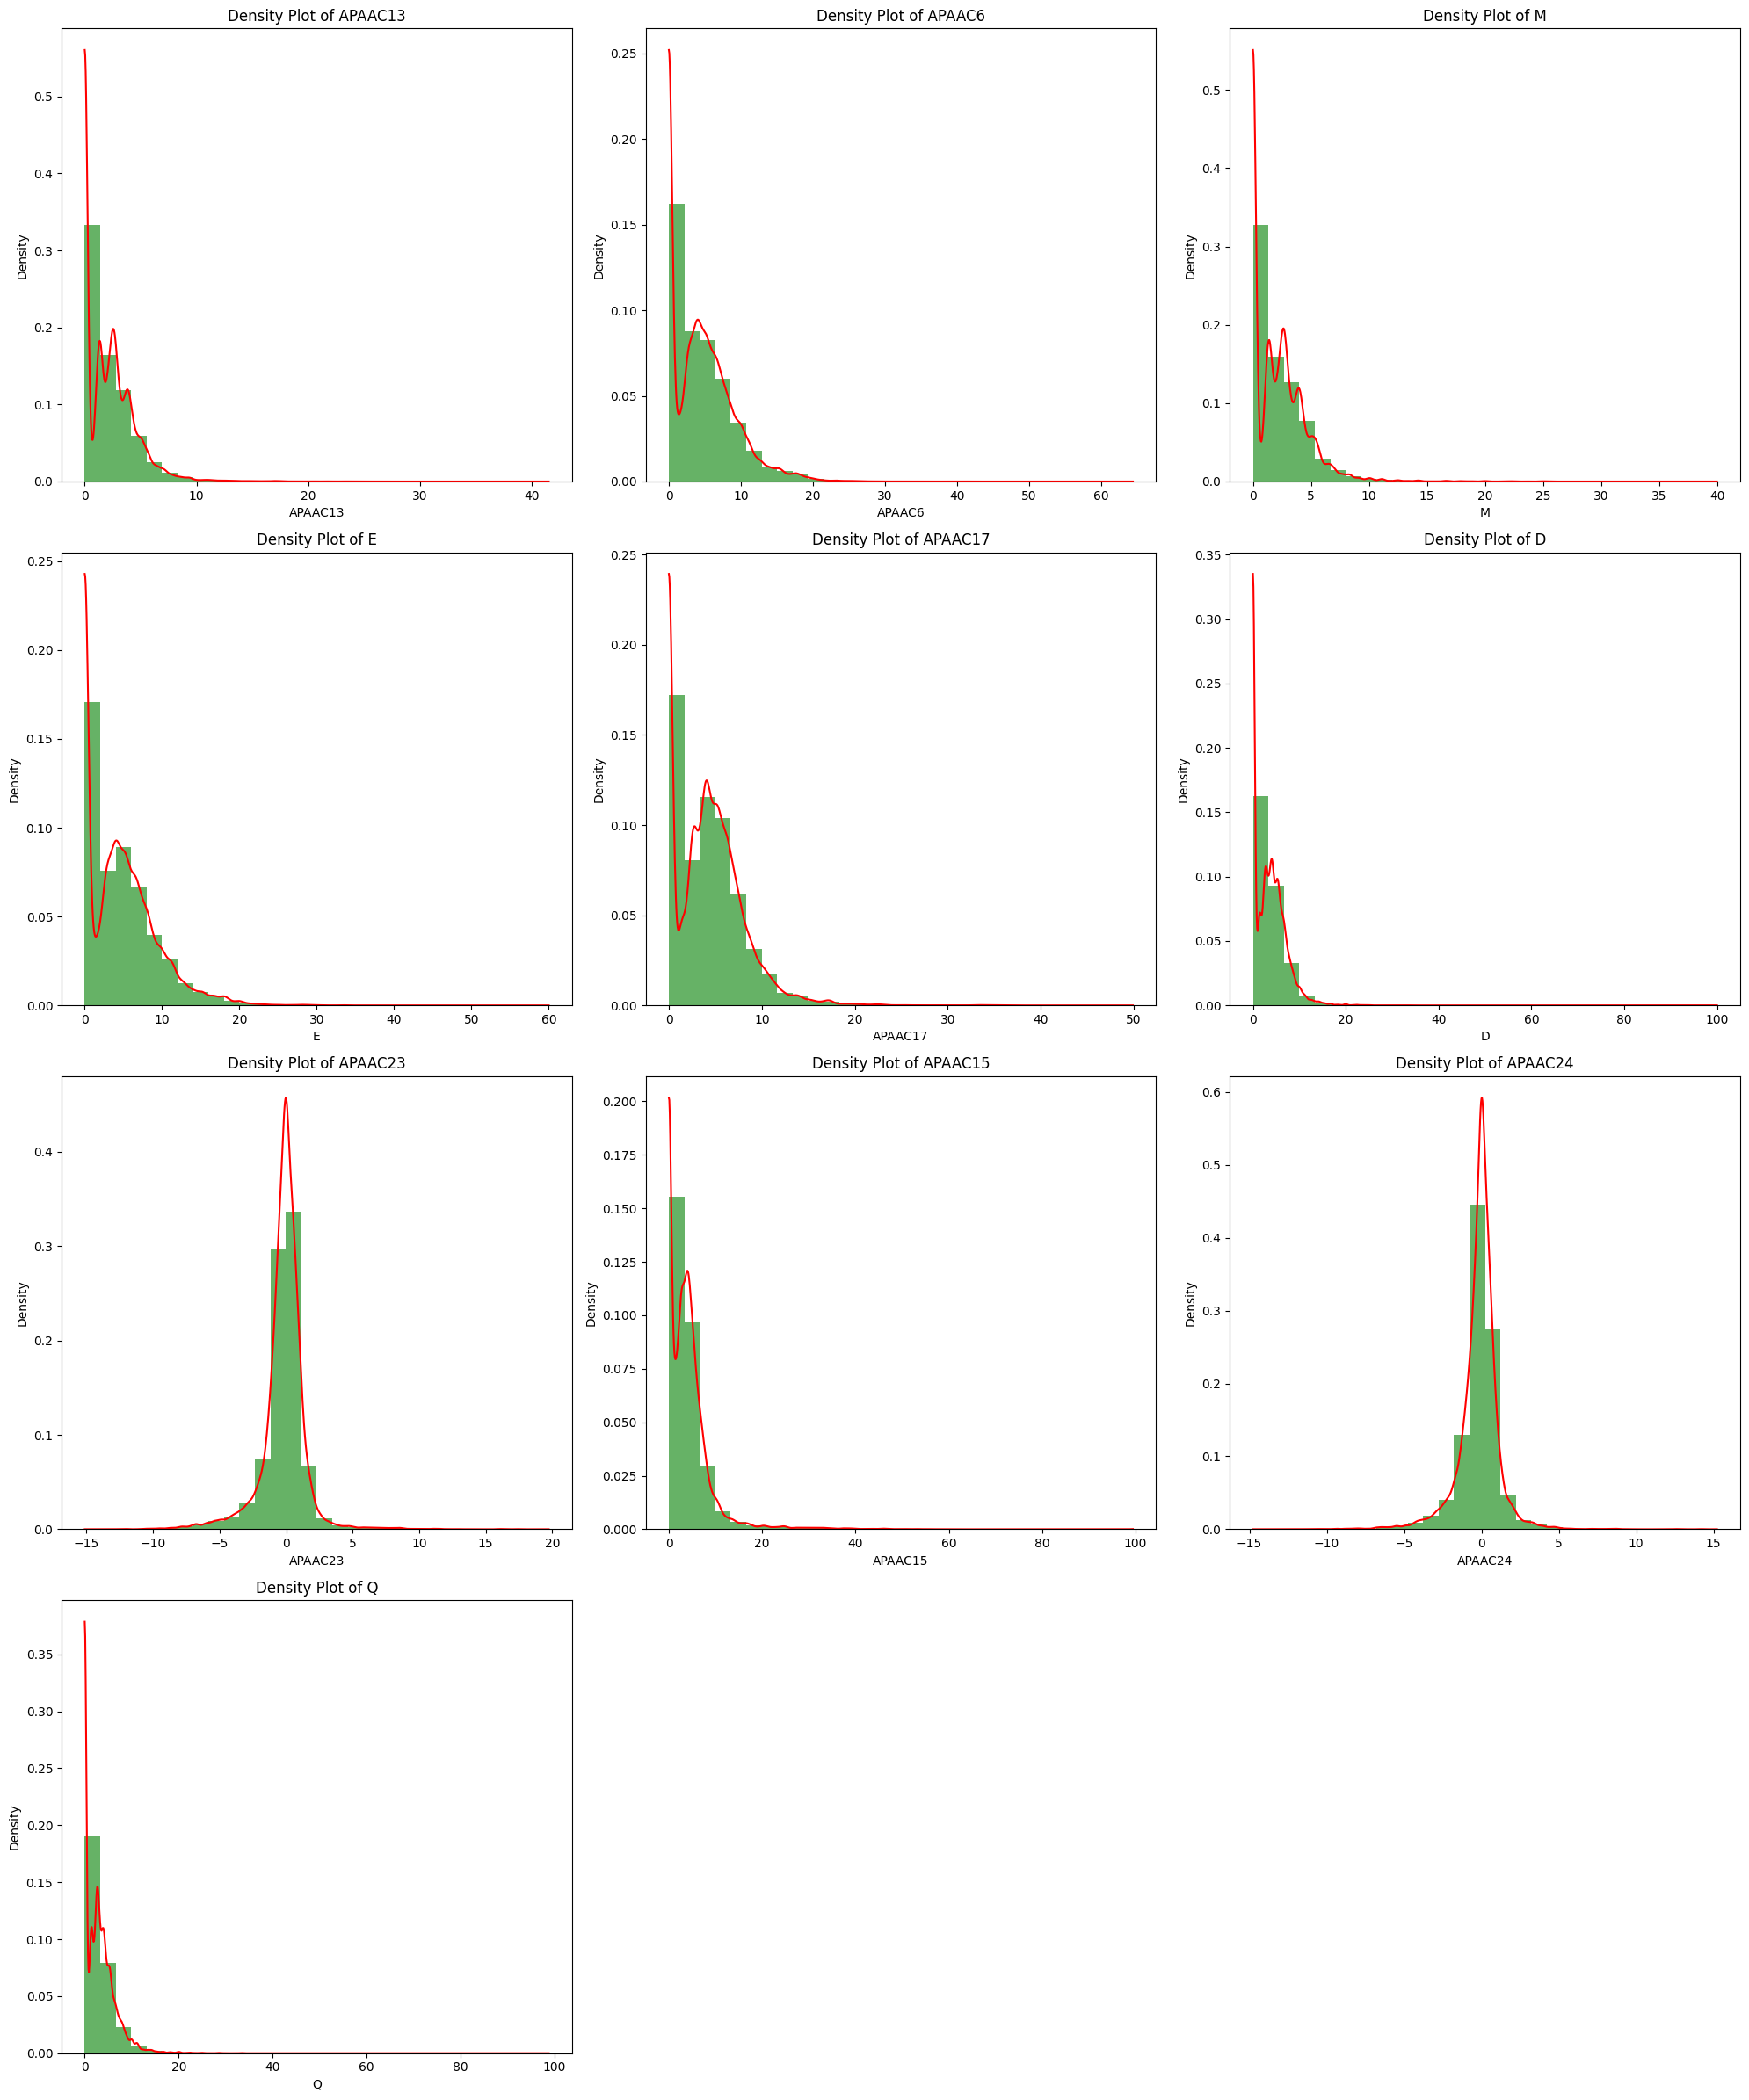

In [ ]:
plt.figure(figsize=(20, num_rows * 6))

for i, feature in enumerate(top_rfe_features, 1):
    plt.subplot(num_rows, num_cols, i)
    data = X_top_rfe[feature].dropna()
    plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

    density = stats.gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 1000)
    plt.plot(x_vals, density(x_vals), 'r')

    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.savefig('Density plots.png')
plt.show()

# **Inferential Statistics**

In [ ]:
#Z test
def z_test(feature, X, y):
    group1 = X[feature][y == 0]
    group2 = X[feature][y == 1]
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    z_score = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))
    p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test
    return z_score, p_value

#T-test
def t_test(feature, X, y):
    group1 = X[feature][y == 0]
    group2 = X[feature][y == 1]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

#ANOVA
def anova_test(feature, X, y):
    group1 = X[feature][y == 0]
    group2 = X[feature][y == 1]
    f_stat, p_value = stats.f_oneway(group1, group2)
    return f_stat, p_value

#Mann-Whitney U test
def mann_whitney_u_test(feature, X, y):
    group1 = X[feature][y == 0]
    group2 = X[feature][y == 1]
    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    return u_stat, p_value

z_test_results = {"Feature": [], "Z-score": [], "P-value": []}
t_test_results = {"Feature": [], "T-statistic": [], "P-value": []}
anova_results = {"Feature": [], "F-statistic": [], "P-value": []}
mann_whitney_results = {"Feature": [], "U-statistic": [], "P-value": []}

for feature in top_rfe_features:
    z_score, z_p_value = z_test(feature, X, y)
    t_stat, t_p_value = t_test(feature, X, y)
    f_stat, a_p_value = anova_test(feature, X, y)
    u_stat, u_p_value = mann_whitney_u_test(feature, X, y)

    z_test_results["Feature"].append(feature)
    z_test_results["Z-score"].append(z_score)
    z_test_results["P-value"].append(z_p_value)

    t_test_results["Feature"].append(feature)
    t_test_results["T-statistic"].append(t_stat)
    t_test_results["P-value"].append(t_p_value)

    anova_results["Feature"].append(feature)
    anova_results["F-statistic"].append(f_stat)
    anova_results["P-value"].append(a_p_value)

    mann_whitney_results["Feature"].append(feature)
    mann_whitney_results["U-statistic"].append(u_stat)
    mann_whitney_results["P-value"].append(u_p_value)

z_test_results_df = pd.DataFrame(z_test_results)
t_test_results_df = pd.DataFrame(t_test_results)
anova_results_df = pd.DataFrame(anova_results)
mann_whitney_results_df = pd.DataFrame(mann_whitney_results)

print("Z-test Results")
print(z_test_results_df)
print("\nT-test Results")
print(t_test_results_df)
print("\nANOVA Results")
print(anova_results_df)
print("\nMann-Whitney U Test Results")
print(mann_whitney_results_df)

Z-test Results
   Feature     Z-score       P-value
0  APAAC13   88.573790  0.000000e+00
1   APAAC6  109.713045  0.000000e+00
2        M   89.480398  0.000000e+00
3        E  106.938889  0.000000e+00
4  APAAC17   50.047290  0.000000e+00
5        D   78.639742  0.000000e+00
6  APAAC23   42.920225  0.000000e+00
7  APAAC15   -6.227769  4.731246e-10
8  APAAC24   50.267043  0.000000e+00
9        Q   45.464309  0.000000e+00

T-test Results
   Feature  T-statistic       P-value
0  APAAC13    90.186249  0.000000e+00
1   APAAC6   110.061200  0.000000e+00
2        M    91.027609  0.000000e+00
3        E   107.379989  0.000000e+00
4  APAAC17    51.309220  0.000000e+00
5        D    79.885856  0.000000e+00
6  APAAC23    44.788424  0.000000e+00
7  APAAC15    -6.466632  1.009584e-10
8  APAAC24    52.389683  0.000000e+00
9        Q    46.313594  0.000000e+00

ANOVA Results
   Feature   F-statistic       P-value
0  APAAC13   8133.559572  0.000000e+00
1   APAAC6  12113.467668  0.000000e+00
2        M  